In [1]:
%matplotlib inline
from sklearn.datasets import load_iris

iris_dataset = load_iris()
print("Keys of iris_dataset : \n{}".format(iris_dataset.keys()))

Keys of iris_dataset : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [2]:
list(iris_dataset.target_names)

['setosa', 'versicolor', 'virginica']

In [3]:
print(iris_dataset.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
list(iris_dataset.feature_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
print("Type of data: {}".format(type(iris_dataset.data)))
print("Shape of data: {}".format(iris_dataset.data.shape))
print("First 5 rows: \n{}".format(iris_dataset.data[:5]))

Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
First 5 rows: 
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [6]:
print("Type of target: {}".format(type(iris_dataset.target)))
print("Shape of target: {}".format(iris_dataset.target.shape))
print("Target: \n{}".format(iris_dataset.target))

Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)
Target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test \
    = train_test_split(iris_dataset.data, iris_dataset.target, random_state=0)

print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (112, 4)
X_test: (38, 4)
y_train: (112,)
y_test: (38,)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f245fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fd09860>]], dtype=object)

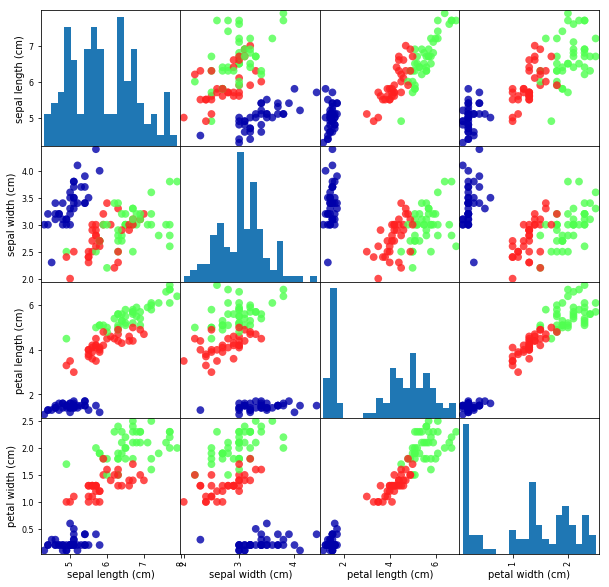

In [12]:
import pandas as pd
import mglearn
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(10,10), marker='o', 
                  hist_kwds={'bins' : 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [20]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Prediction label: {}".format(iris_dataset['target_names'][prediction]))

X_new.shape: (1, 4)
Prediction: [0]
Prediction label: ['setosa']


In [21]:
y_pred = knn.predict(X_test)
print("Test prediction:\n {}".format(y_pred))
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test prediction:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97
